In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
tf.keras.preprocessing.image.save_img('file.png',x_train[0])


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
y_test.shape
x_test.shape

(10000, 32, 32, 3)

In [ ]:
classes=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships','trucks']

In [ ]:

y

array([0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
classes=["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships","trucks"]

Text(0.5, 0, 'deer')

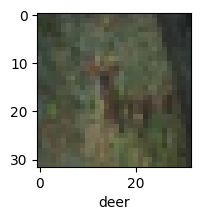

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[10])
#plt.xlabel(y_train[10])
z=list(y_train[10])
p=max(z)
plt.xlabel(classes[z.index(p)])

In [ ]:

model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
         layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:

model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
391/391 [==============================] - 76s 190ms/step - loss: 1.6775 - accuracy: 0.3930 - val_loss: 1.3875 - val_accuracy: 0.5128
Epoch 2/20
391/391 [==============================] - 64s 163ms/step - loss: 1.3766 - accuracy: 0.5096 - val_loss: 1.2652 - val_accuracy: 0.5614
Epoch 3/20
391/391 [==============================] - 62s 158ms/step - loss: 1.2804 - accuracy: 0.5486 - val_loss: 1.1733 - val_accuracy: 0.5932
Epoch 4/20
391/391 [==============================] - 62s 158ms/step - loss: 1.2107 - accuracy: 0.5744 - val_loss: 1.1121 - val_accuracy: 0.6181
Epoch 5/20
391/391 [==============================] - 63s 160ms/step - loss: 1.1560 - accuracy: 0.5944 - val_loss: 1.0753 - val_accuracy: 0.6310
Epoch 6/20
391/391 [==============================] - 60s 154ms/step - loss: 1.1180 - accuracy: 0.6108 - val_loss: 1.0463 - val_accuracy: 0.6428
Epoch 7/20
391/391 [==============================] - 64s 164ms/step - loss: 1.0851 - accuracy: 0.6220 - val_loss: 1.0073 - val_ac

In [ ]:
def generate_adversarial_examples(model, x, y, eps=0.01):
    # Calculate the loss and gradient of the model with respect to the input
    loss_object = keras.losses.CategoricalCrossentropy()
    with tf.GradientTape() as tape:
        tape.watch(x)
        predictions = model(x)
        loss = loss_object(y, predictions)
    gradient = tape.gradient(loss, x)

    
    signed_grad = tf.sign(gradient)
    perturbed_x = x + eps * signed_grad
    perturbed_x = tf.clip_by_value(perturbed_x, 0, 1)

    return perturbed_x


In [ ]:
x_test_tf = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

x_test_adv = generate_adversarial_examples(model, x_test_tf, y_test_tf)
#tf.keras.preprocessing.image.save_img('file.png',x_test_adv)




313/313 [==============================] - 3s 11ms/step


Text(0.5, 0, 'deer')

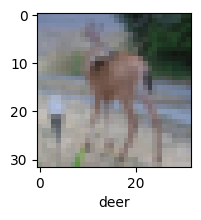

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(x_test[100])
p=model.predict(x_test)
z=list(p[100])
p=max(z)
plt.xlabel(classes[z.index(p)])


313/313 [==============================] - 3s 11ms/step


Text(0.5, 0, 'horses')

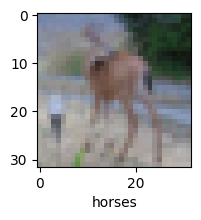

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(x_test_adv[100])
p=model.predict(x_test_adv)
z=list(p[100])
p=max(z)
plt.xlabel(classes[z.index(p)])



In [ ]:
# Evaluate the model on the adversarial examples
model.evaluate(x_test_adv, y_test)


313/313 [==============================] - 4s 13ms/step - loss: 2.0658 - accuracy: 0.3066


[2.0658304691314697, 0.30660000443458557]

313/313 [==============================] - 4s 11ms/step


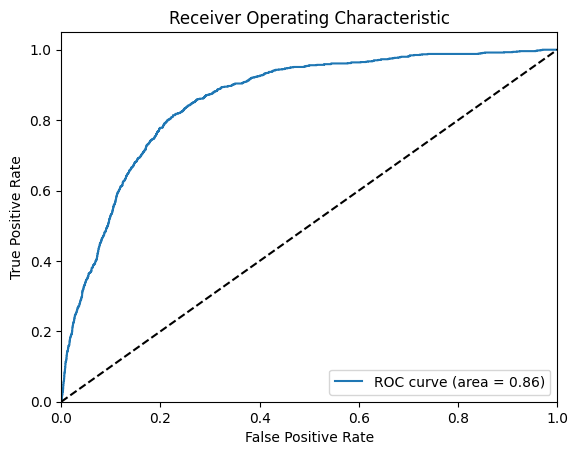

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for the test data
y_pred = model.predict(x_test_adv)

# Compute the false positive rate and true positive rate for class 0
fpr, tpr, _ = roc_curve(y_test[:, 0], y_pred[:, 0])

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


1/1 [==============================] - 0s 24ms/step


Adversarial attack failed.


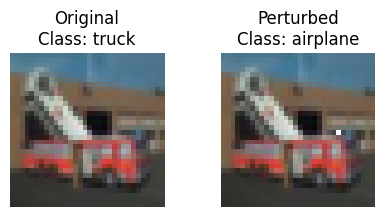

In [ ]:
items = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

target_class = 3

# Select a random image from the test set
image_index = np.random.randint(len(x_test))
original_image = x_test[image_index]
original_label = items[np.argmax(model.predict(np.expand_dims(original_image, axis=0)))]

# Generate random coordinates and color for the perturbation
pixel_index = np.random.randint(32, size=(2))
perturbation_color = np.random.randint(256, size=(3))

# Modify the selected pixel with the perturbation color
perturbed_image = np.copy(original_image)
perturbed_image[pixel_index[0], pixel_index[1]] = perturbation_color

# Predict the label for the perturbed image
perturbed_label = items[np.argmax(model.predict(np.expand_dims(perturbed_image, axis=0)))]

# Check if the perturbation succeeded in changing the label
if perturbed_label == target_class:
    print('Adversarial attack succeeded!')
else:
    print('Adversarial attack failed.')

# Display the original and perturbed images
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title(f'Original\nClass: {original_label}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(perturbed_image)
plt.title(f'Perturbed\nClass: {perturbed_label}')
plt.axis('off')

plt.show()